# 🌿 Classificação de Tumores com Regressão Logística

## 📌 Sobre o Dataset Breast Cancer
O **Breast Cancer Dataset** contém informações sobre tumores mamários classificados como benignos ou malignos. O objetivo é usar essas características para prever se um tumor é **benigno** (0) ou **maligno** (1).

As características incluem:  
- 📏 **Raio** (mean radius)  
- 📏 **Textura** (mean texture)  
- 🌿 **Perímetro** (mean perimeter)  
- 🌿 **Área** (mean area)  
- 🧬 **Compactação** (mean compactness)  
E várias outras características relacionadas a cada tumor.

---

## 🚀 O que o código faz?
Este código implementa um modelo **Regressão Logística** para prever se um tumor é benigno ou maligno.  

🔹 **Carrega o dataset de câncer de mama**  
🔹 **Divide os dados em treino e teste** (80/20)  
🔹 **Treina um modelo de Regressão Logística**  
🔹 **Avalia o modelo** com métricas como acurácia, relatório de classificação e matriz de confusão  

---

## 🛠️ Como funciona o código?
O código está estruturado com funções para facilitar a compreensão:

1️⃣ **`carregar_dataset()`** → Carrega e exibe as primeiras linhas do dataset  
2️⃣ **`dividir_dados(X, y)`** → Divide os dados em treino e teste  
3️⃣ **`treinar_logistica(X_train, y_train)`** → Treina o modelo de Regressão Logística  
4️⃣ **`avaliar_modelo(modelo, X_test, y_test, target_names)`** → Avalia o desempenho do modelo  

---

## 📊 Avaliação do Modelo
Após o treinamento, o código exibe:  

✔ **Acurácia** do modelo  
✔ **Relatório de classificação** (Precisão, Recall, F1-Score)  
✔ **Matriz de confusão** visualizada com `seaborn`  

📌 *Matriz de Confusão Gerada:*  
🔵 Azul = Classificações corretas  
⚪ Branco = Erros do modelo  

---

## 🔧 Requisitos
Antes de rodar o código, instale as dependências necessárias:

```bash
pip install numpy pandas scikit-learn seaborn matplotlib


📌 Primeiras 5 linhas do dataset Breast Cancer:

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst textur

C:\Users\jonat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


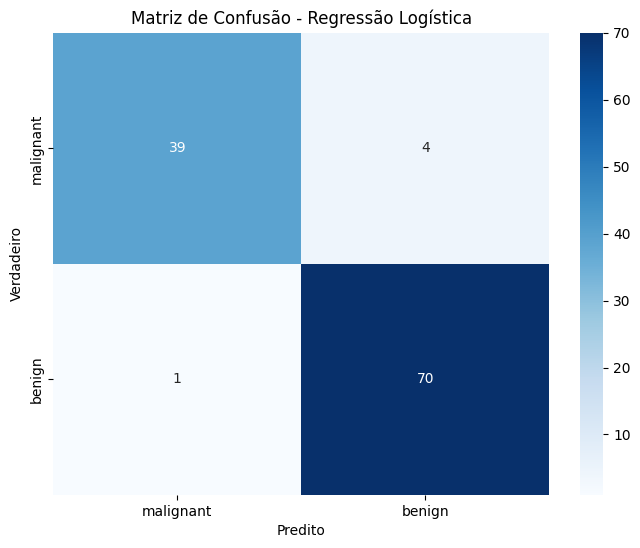

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔹 Função para carregar e visualizar o dataset Breast Cancer
def carregar_dataset():
    cancer = load_breast_cancer()
    df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
    df_cancer['target'] = cancer.target
    print("📌 Primeiras 5 linhas do dataset Breast Cancer:\n")
    print(df_cancer.head(), "\n")
    return cancer, df_cancer

# 🔹 Função para dividir os dados em treino e teste
def dividir_dados(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# 🔹 Função para treinar o modelo de Regressão Logística
def treinar_logistica(X_train, y_train):
    modelo = LogisticRegression(max_iter=200)
    modelo.fit(X_train, y_train)
    return modelo

# 🔹 Função para avaliar o modelo
def avaliar_modelo(modelo, X_test, y_test, target_names):
    y_pred = modelo.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Acurácia do modelo: {accuracy:.2f}\n")

    print("📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title("Matriz de Confusão - Regressão Logística")
    plt.show()

# 🚀 Fluxo principal do código
if __name__ == "__main__":
    # Carregando o dataset
    cancer, df_cancer = carregar_dataset()
    X, y = cancer.data, cancer.target
    
    # Dividindo os dados
    X_train, X_test, y_train, y_test = dividir_dados(X, y)
    
    # Treinando o modelo de Regressão Logística
    modelo_logistica = treinar_logistica(X_train, y_train)
    
    # Avaliando o modelo
    avaliar_modelo(modelo_logistica, X_test, y_test, cancer.target_names)
